# 1. Data Preprocessing & Merging

#### Alfredo Di Massimo

#### BrainStation, Data Science

#### April 4th, 2022

___

We've all experienced the joys and disappointment of taking the time to sit down to watch a new movie, either based on a recommendation or general curiosity for a new title. Movie reviews are one of the best ways for consumers to express how they felt after leaving the theaters, but what exactly is important to them when describing their viewing experience?

In this project, I'll be exploring the language used in reviews when describing a a consumers experience watching a new movie. I'm interested in which specific words are used to describe someone's assessment of whether a movie is "good" or "bad"; which words are used to express a positive and negative sentiment? Having this information can then be applied within the movie industry by directors and marketing teams to create movies and promote them in a way that's meanigful to movie-goers.

This project is separated into 4 notebooks, each with a particular task aimed at addressing the above goal. The notebooks are separated as such:
- **1. Data Preprocessing and Merging**: Here we will describe the source and format of the data as well as how it is prepared to be used in the remainder of the project.
- **2. Cleaning and EDA**: The data is further cleaned and investigated so as to gain basic statistical insights and determine whether any other topics can be explored.
- **3. Modleing**: Machine learning techniques are applied so as to determine whether the sentiment behind a review can be accurately predicted.
- **4. Findings and Interpretation**: We will dive into the results of our study to determine what specifc language is used in reviews, what other factors may affect a reviewer's sentiment  and how these findings can be applied in a real-world setting.

___

This notebook will focus primarily on importing the necessary files, gaining insight on the information being provided and preparing each individual dataset for merging. The primary goal of this section is to create a single dataframe from which Exploratory Data Analysis and Data Cleaning can be performed. A data dictionary provided by the original data source will be included upon importing the dataset files provided by the [IMDb Dataset](https://www.imdb.com/interfaces/) and the [IMDb Movies Reviews](https://paperswithcode.com/dataset/imdb-movie-reviews) study written by Andrew L. Maas et al. A desciption of the URL's and Reviews datasets can be found within the ***Appendix*** notebook of this project in addition to their importing process.

The workflow for this notebook can be broken down as follows:
1. Import IMDb movie dataset and merge:
    1.1 Explore each table within the dataset
    1.2 Clean the datasets and drop unnecessary columns
    1.3 Merge the individual datasets to create a single dataframe containing essential information
2. Import Review URL's and prepare for merging with individual reviews
3. Import Reviews, process into workable dataframes and combine with Review URL's
4. Merge the main Movies Dataset and Reviews    

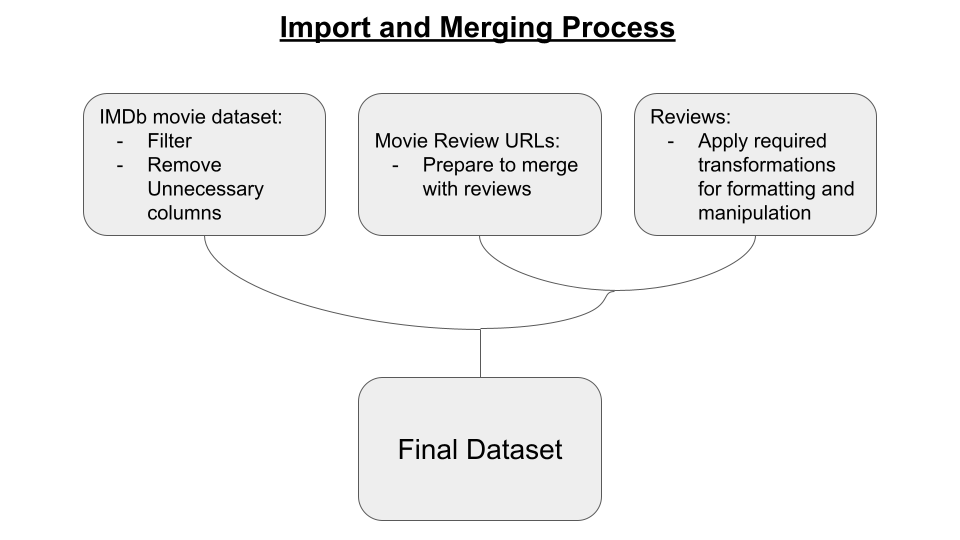

In [1]:
from IPython import display
display.Image("Import and Merging.png")

In [55]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.setstyle='whitegrid'
import matplotlib.pyplot as plt
import pickle
import joblib

## IMDb Movie Dataset
This dataset is compsed of multiple tables from which we will gather the necessary information by filtering and dropping non-essential columns to ultimately end up with a single dataset that contains basic information on the movies found on [IMDb](https://www.imdb.com/?ref_=nv_home).

### `Basics` Data

In [2]:
title_basics = pd.read_csv('title.basics.tsv.gz', sep='\t')
title_basics.head()

C:\Users\Alfredo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [3]:
print(f"This data set contains {title_basics.shape[0]} rows and {title_basics.shape[1]} columns")

This data set contains 8699991 rows and 9 columns


**Data Dictionary**:Contains the following information for titles

- tconst (string) - alphanumeric unique identifier of the title
- titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
- primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
- originalTitle (string) - original title, in the original language
- isAdult (boolean) - 0: non-adult title; 1: adult title
- startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
- endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
- runtimeMinutes – primary runtime of the title, in minutes
- genres (string array) – includes up to three genres associated with the title
<br/>

**Columns to drop**:
- originalTitle: The information provided is essentially the same as what is provided in the primaryTitle column.
- isAdult: This project will take adult films into consideration.
- endYear: Pertains specifically to TV Series and is therefore irrelevant to the project.

Prior to dropping columns, as this is the primary dataset upon which the final dataframe will be built, we can filter for **titleType** *movie* now in addition to filtering for those where **isAdult** is 0.

In [4]:
title_basics = title_basics.loc[(title_basics['titleType'] == 'movie') & (title_basics['isAdult'] == 0)]

In [5]:
title_basics.shape

(590332, 9)

Filtering for movies and non-adult films reduces the size of the dataset significantly from ~8,700,000 to ~590,300. This will allow for more more computationally efficient cleaning and EDA.

In [6]:
title_basics.drop(columns=['originalTitle', 'isAdult', 'endYear', 'titleType'], inplace=True)
title_basics.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres
498,tt0000502,Bohemios,1905,100,\N
570,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography"
587,tt0000591,The Prodigal Son,1907,90,Drama
610,tt0000615,Robbery Under Arms,1907,\N,Drama
625,tt0000630,Hamlet,1908,\N,Drama


Per the dataset's documentation, '\N' is used to denote that a particular field is missing or null for that title/name so we will replace these with actual `np.nan` values to be handled later.

In [7]:
title_basics = title_basics.replace('\\N', np.nan)
title_basics.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres
498,tt0000502,Bohemios,1905,100,NaN
570,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography"
587,tt0000591,The Prodigal Son,1907,90,Drama
610,tt0000615,Robbery Under Arms,1907,NaN,Drama
625,tt0000630,Hamlet,1908,NaN,Drama


### `Ratings` Data

In [8]:
title_ratings = pd.read_csv('title.ratings.tsv.gz', sep='\t')
title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1858
1,tt0000002,6.0,243
2,tt0000003,6.5,1630
3,tt0000004,6.0,158
4,tt0000005,6.2,2455


In [9]:
print(f"This data set contains {title_ratings.shape[0]} rows and {title_ratings.shape[1]} columns")

This data set contains 1215383 rows and 3 columns


**Data Dictionary**:
Contains the IMDb rating and votes information for titles
- tconst (string) - alphanumeric unique identifier of the title
- averageRating – weighted average of all the individual user ratings
- numVotes - number of votes the title has received

In [10]:
# Replacing '\N' with actual np.nan values
title_ratings = title_ratings.replace('\\N', np.nan)

### `Akas` Data

In [11]:
title_akas = pd.read_csv('title.akas.tsv.gz', sep='\t')
title_akas.head()

C:\Users\Alfredo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [12]:
print(f"This data set contains {title_akas.shape[0]} rows and {title_akas.shape[1]} columns")

This data set contains 30986068 rows and 8 columns


**Data Dictionary**:
Contains the IMDb rating and votes information for titles
- titleId (string) - a tconst, an alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- title (string) – the localized title
- region (string) - the region for this version of the title
- language (string) - the language of the title
- types (array) - Enumerated set of attributes for this alternative title. One or more of the following: "alternative", "dvd", - "festival", "tv", "video", "working", "original", "imdbDisplay". New values may be added in the future without warning
- attributes (array) - Additional terms to describe this alternative title, not enumerated
- isOriginalTitle (boolean) – 0: not original title; 1: original title
<br/>

**Columns to drop**:
- ordering
- title
- region
- types
- attributes
- isOriginalTitle

Before dropping these columns however, we will filter from this list only those titles whose language is English.

In [13]:
title_akas['language'].unique()

array(['\\N', 'ja', 'en', 'sv', 'tr', 'es', 'sr', 'cs', 'sk', 'fr', 'fa',
       'bg', 'ca', 'qbn', 'ru', 'nl', 'pt', 'cmn', 'uz', 'uk', 'qbp',
       'ar', 'rn', 'bs', 'ga', 'de', 'hi', 'th', 'yi', 'qbo', 'ka', 'hr',
       'sl', 'he', 'it', 'tg', 'kk', 'bn', 'da', 'el', 'fi', 'be', 'st',
       'gsw', 'gl', 'eu', 'yue', 'az', 'ms', 'pl', 'id', 'mr', 'mi', 'ta',
       'af', 'la', 'hy', 'ur', 'te', 'ml', 'tl', 'lt', 'mk', 'et', 'lv',
       'gd', 'cy', 'qal', 'xh', 'gu', 'kn', 'ro', 'pa', 'wo', 'no', 'is',
       'hu', 'sq', 'vi', 'zh', 'tk', 'ps', 'zu', 'ky', 'sd', 'ku', 'rm',
       'roa', 'su', 'ko', 'jv', 'prs', 'fro', 'haw', 'mn', 'lo', 'my',
       'am', 'qac', 'ne', 'myv', 'br', 'iu', 'tn', 'cr'], dtype=object)

In [14]:
title_akas = title_akas[title_akas['language'] == 'en']

In [15]:
title_akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
39,tt0000005,4,Blacksmith Scene,CA,en,imdbDisplay,\N,0
95,tt0000010,6,La sortie de l'usine Lumière à Lyon,CA,en,imdbDisplay,\N,0
115,tt0000012,22,The Arrival of a Train,XWW,en,imdbDisplay,\N,0
117,tt0000012,24,L'arrivée d'un train à La Ciotat,CA,en,imdbDisplay,\N,0
120,tt0000012,27,The Arrival of a Train,XEU,en,imdbDisplay,\N,0


Seeing that the **titleId** column previously had repeating values in order to list **region**, we can verify that there are no repeating values.

In [16]:
title_akas.shape[0] == title_akas['titleId'].nunique()

False

In [17]:
# To solve for this, we can group the rows by the 'titleId' columns and concatenate the other columns
# here we can also drop unnecessary columns
title_akas = title_akas.groupby(title_akas['titleId']).agg({'language': lambda x: list(x)}).reset_index()
title_akas.head()

,titleId,language
0,tt0000005,[en]
1,tt0000010,[en]
2,tt0000012,"[en, en, en, en]"
3,tt0000013,[en]
4,tt0000016,[en]


In [18]:
# Since we know that the remaining rows correspod exclusively to movies in english, we can drop the 'language' column
title_akas.drop(columns='language',inplace=True)
title_akas.head()

,titleId
0,tt0000005
1,tt0000010
2,tt0000012
3,tt0000013
4,tt0000016


In [19]:
# Confirm that the values in the 'titleId' field are unique
title_akas.shape[0] == title_akas.index.nunique()

True

Finally we can change the **titleId** to **tconst** for simple merging later and remove the '\N' values.

In [20]:
title_akas.rename({'titleId': 'tconst'}, axis=1, inplace=True)

In [21]:
title_akas.head()

,tconst
0,tt0000005
1,tt0000010
2,tt0000012
3,tt0000013
4,tt0000016


### Merging IMDB Data Sets

First we merge the `Akas` and `Basics` data along the **tconst** unique key using an inner join as we are only interested in the data available for English movies.

In [22]:
movies = title_akas.merge(title_basics, on='tconst', how='inner')
movies.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres
0,tt0000838,A Cultura do Cacau,1909,NaN,NaN
1,tt0000941,Locura de amor,1909,NaN,Drama
2,tt0001051,El sueño milagroso,1909,NaN,NaN
3,tt0001122,The Red Inn,1910,NaN,NaN
4,tt0001175,Camille,1912,NaN,"Drama,Romance"


Next we can merge in the `ratings` data.

In [23]:
movies = movies.merge(title_ratings, on='tconst', how='inner')

In [24]:
# Confirm the additional columns were added
movies.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000941,Locura de amor,1909,NaN,Drama,4.8,23
1,tt0001122,The Red Inn,1910,NaN,NaN,5.3,18
2,tt0001175,Camille,1912,NaN,"Drama,Romance",5.8,35
3,tt0001338,A Night in May,1910,NaN,Drama,5.3,16
4,tt0001790,"Les Misérables, Part 1: Jean Valjean",1913,60,Drama,6.0,44


In [25]:
movies.shape

(101296, 7)

## Review URLs

The URL lists will be used to merge main movie information dataframe with the individual positive and negative review text files. It must first be prepared to be merged with the actual reviews later in this notebook so as to identify the movies upon which the individual reviews are based.

In [26]:
test_neg_urls = pd.read_table(r"~\DS-2022\Capstone\Reviews\test\urls_neg.txt",sep='/', names=range(0,6))
test_pos_urls = pd.read_table(r"~\DS-2022\Capstone\Reviews\test\urls_pos.txt",sep='/', names=range(0,6))
train_neg_urls = pd.read_table(r"~\DS-2022\Capstone\Reviews\train\urls_neg.txt",sep='/', names=range(0,6))
train_pos_urls = pd.read_table(r"~\DS-2022\Capstone\Reviews\train\urls_pos.txt",sep='/', names=range(0,6))
train_unsup_urls = pd.read_table(r"~\DS-2022\Capstone\Reviews\train\urls_unsup.txt",sep='/', names=range(0,6))

The unique id label in each review coresponds to the line number of each `review_url` database (i.e.: '0_2.txt ' corresponds to review at index 0 and has a rating of 2.

In [27]:
test_neg_urls.head()

,0,1,2,3,4,5
0,http:,NaN,www.imdb.com,title,tt0406816,usercomments
1,http:,NaN,www.imdb.com,title,tt0406816,usercomments
2,http:,NaN,www.imdb.com,title,tt0406816,usercomments
3,http:,NaN,www.imdb.com,title,tt0406816,usercomments
4,http:,NaN,www.imdb.com,title,tt0406816,usercomments


As we are only interested in **column 4** which contains the unique id's which will be used to merge onto the main dataframe, we will drop the other columns.

In [28]:
test_neg_urls = test_neg_urls.rename({4: 'tconst'}, axis=1).drop(columns=[0, 1, 2, 3, 5])
test_pos_urls = test_pos_urls.rename({4: 'tconst'}, axis=1).drop(columns=[0, 1, 2, 3, 5])
train_neg_urls = train_neg_urls.rename({4: 'tconst'}, axis=1).drop(columns=[0, 1, 2, 3, 5])
train_pos_urls = train_pos_urls.rename({4: 'tconst'}, axis=1).drop(columns=[0, 1, 2, 3, 5])
train_unsup_urls = train_unsup_urls.rename({4: 'tconst'}, axis=1).drop(columns=[0, 1, 2, 3, 5])

In [29]:
# Confirm correct columns were dropped
display(test_neg_urls.head(1))
display(test_pos_urls.head(1))
display(train_neg_urls.head(1))
display(train_pos_urls.head(1))
display(train_unsup_urls.head(1))

,tconst
0,tt0406816


,tconst
0,tt0406816


,tconst
0,tt0064354


,tconst
0,tt0453418


,tconst
0,tt0018515


## Reviews

Because the reviews were provided already split into test and train sets, we will import them individually. The split performed however was 50% for test and 50% for train. Given a validation set is also required further during the modelling phase, splitting the training set further would not provide us with enough information to model the data and so the train and test sets will be mergred to be split once more later.

In [30]:
%%time
# Load in the 4 review dataframes imported in the "Reviews Import" notebook

df_test_neg = pd.read_csv('df_test_neg.csv', engine='python')
df_test_pos = pd.read_csv('df_test_pos.csv', engine='python')
df_train_neg = pd.read_csv('df_train_neg.csv', engine='python')
df_train_pos = pd.read_csv('df_train_pos.csv', engine='python')

Wall time: 4min 31s


In [31]:
# We can verify 1 of the dataframes to ensure it was loaded in properly
df_test_neg.head()

,Unnamed: 0,0_2.txt,10000_4.txt,10001_1.txt,10002_3.txt,10003_3.txt,10004_2.txt,10005_2.txt,10006_2.txt,10007_4.txt,...,9993_2.txt,9994_3.txt,9995_2.txt,9996_2.txt,9997_2.txt,9998_1.txt,9999_1.txt,999_3.txt,99_3.txt,9_4.txt
0,0,Once again Mr. Costner has dragged out a movie...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NaN,This is an example of why the majority of acti...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,NaN,NaN,"First of all I hate those moronic rappers, who...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,NaN,NaN,NaN,Not even the Beatles could write songs everyon...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,NaN,NaN,NaN,Brass pictures (movies is not a fitting word f...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# We can create a list of dataframe to iterate through
dataframes = [df_test_neg, df_test_pos, df_train_neg, df_train_pos]

In [33]:
# reviews are set along main diagonal - backfill all rows up to index 0
for df in dataframes:
    df.bfill(inplace=True)

In [34]:
# drop all but first row
df_test_neg = pd.DataFrame(df_test_neg.iloc[0,:])
df_test_pos = pd.DataFrame(df_test_pos.iloc[0,:])
df_train_neg = pd.DataFrame(df_train_neg.iloc[0,:])
df_train_pos = pd.DataFrame(df_train_pos.iloc[0,:])

In [35]:
# reset the index in order to manipulate the string data in current index
df_test_neg.reset_index(inplace=True)
df_test_pos.reset_index(inplace=True)
df_train_neg.reset_index(inplace=True)
df_train_pos.reset_index(inplace=True)

In [36]:
# separate the unique key from the ''[rating].txt' string
df_test_neg[['unique_key', 'rating']] = df_test_neg['index'].str.split('_', expand=True)
df_test_pos[['unique_key', 'rating']] = df_test_pos['index'].str.split('_', expand=True)
df_train_neg[['unique_key', 'rating']] = df_train_neg['index'].str.split('_', expand=True)
df_train_pos[['unique_key', 'rating']] = df_train_pos['index'].str.split('_', expand=True)

In [37]:
#drop first row
df_test_neg = df_test_neg.iloc[1: , :]
df_test_pos = df_test_pos.iloc[1: , :]
df_train_neg = df_train_neg.iloc[1: , :]
df_train_pos = df_train_pos.iloc[1: , :]

In [38]:
# The dataframes in the original 'dataframes' listed were stored into new sets so we must reinstantiate this list
dataframes = [df_test_neg, df_test_pos, df_train_neg, df_train_pos]

In [39]:
for df in dataframes:
    # convert unique key to be sorted in order to merge with url dataframe
    df['unique_key'] = pd.to_numeric(df['unique_key'])
    
    #reviews will be paired to the URL key via the unique key which corresponds to the row index in the URL list
    df.sort_values(by='unique_key', inplace=True)
    
    # remove the .txt in rating column
    df[['rating', 'txt']] = df['rating'].str.split('.', expand=True)
    
    # with the unique key and rating extracted, we can now drop the original [unique_key][rating] pair and .txt suffix columns
    df.drop(columns=['txt', 'index'], inplace=True)
    
    # reset the index to match unique key
    df.reset_index(drop=True, inplace=True)

In [40]:
# we can confirm that no unique keys are skipped and that each one matches the index of the row
np.where(df_test_neg['unique_key'] != df_test_neg['unique_key'].index, 1, 0).sum()
np.where(df_test_pos['unique_key'] != df_test_pos['unique_key'].index, 1, 0).sum()
np.where(df_train_neg['unique_key'] != df_train_neg['unique_key'].index, 1, 0).sum()
np.where(df_train_pos['unique_key'] != df_train_pos['unique_key'].index, 1, 0).sum()

0

In [41]:
# drop the original index and 'unique_key' columns
for df in dataframes:
    df.drop(columns='unique_key', inplace=True)

In [42]:
# Confirm the datatype of all columns
df_test_neg.info()
df_test_pos.info()
df_train_neg.info()
df_train_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       12500 non-null  object
 1   rating  12500 non-null  object
dtypes: object(2)
memory usage: 195.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       12500 non-null  object
 1   rating  12500 non-null  object
dtypes: object(2)
memory usage: 195.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       12500 non-null  object
 1   rating  12500 non-null  object
dtypes: object(2)
memory usage: 195.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 2 columns):
 #   Colum

In [43]:
# we can convert the 'rating' column into integers
for df in dataframes:
    df['rating'] = pd.to_numeric(df['rating'])

In [44]:
# Confirm the datatype of all columns
df_test_neg.info()
df_test_pos.info()
df_train_neg.info()
df_train_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       12500 non-null  object
 1   rating  12500 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 195.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       12500 non-null  object
 1   rating  12500 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 195.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       12500 non-null  object
 1   rating  12500 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 195.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns

Now that we have our desired **reviews** and **rating** columns, we can concatenate these datasets with the corresponding url dataframe.

In [45]:
df2_test_neg = pd.concat([test_neg_urls, df_test_neg], axis=1).rename({0: 'negative_review', 'rating': 'negative_rating'}, axis=1)
df2_test_pos = pd.concat([test_pos_urls, df_test_pos], axis=1).rename({0: 'positive_review', 'rating': 'positive_rating'}, axis=1)
df2_train_neg = pd.concat([train_neg_urls, df_train_neg], axis=1).rename({0: 'negative_review', 'rating': 'negative_rating'}, axis=1)
df2_train_pos = pd.concat([train_pos_urls, df_train_pos], axis=1).rename({0: 'positive_review', 'rating': 'positive_rating'}, axis=1)

In [46]:
# Confirm the dataframes were properly concatenated
df2_test_neg.head()

,tconst,negative_review,negative_rating
0,tt0406816,Once again Mr. Costner has dragged out a movie...,2
1,tt0406816,This is a pale imitation of 'Officer and a Gen...,3
2,tt0406816,"It seems ever since 1982, about every two or t...",3
3,tt0406816,"Wow, another Kevin Costner hero movie. Postman...",4
4,tt0406816,"Alas, another Costner movie that was an hour t...",4


In [47]:
# Confirm the original dataframe shapes were maintained
df2_test_neg.shape

(12500, 3)

Now that individual review sets have been matched to their corresponding URL unique ID's, the test and train dataframes can be merged to be split during the pre-modelign phase later.

In [48]:
neg_reviews = pd.concat([df2_test_neg, df2_train_neg], axis=0)
pos_reviews = pd.concat([df2_test_pos, df2_train_pos], axis=0)

In [49]:
# confirm that the 2 dataframes successfully concatenated
display(neg_reviews.head())
display(neg_reviews.shape)

,tconst,negative_review,negative_rating
0,tt0406816,Once again Mr. Costner has dragged out a movie...,2
1,tt0406816,This is a pale imitation of 'Officer and a Gen...,3
2,tt0406816,"It seems ever since 1982, about every two or t...",3
3,tt0406816,"Wow, another Kevin Costner hero movie. Postman...",4
4,tt0406816,"Alas, another Costner movie that was an hour t...",4


(25000, 3)

In [50]:
reviews = pd.concat([neg_reviews.rename(columns={'negative_review': 'review', 'negative_rating': 'review_rating'}),
                     pos_reviews.rename(columns={'positive_review': 'review', 'positive_rating': 'review_rating'})],
                    ignore_index=True)

In [51]:
# Confirm column names were changed and no rows were lost in concatentation of negative and positive dataframes
display(reviews.head())
reviews.shape[0]

,tconst,review,review_rating
0,tt0406816,Once again Mr. Costner has dragged out a movie...,2
1,tt0406816,This is a pale imitation of 'Officer and a Gen...,3
2,tt0406816,"It seems ever since 1982, about every two or t...",3
3,tt0406816,"Wow, another Kevin Costner hero movie. Postman...",4
4,tt0406816,"Alas, another Costner movie that was an hour t...",4


50000

In [52]:
reviews['review_word_count'] = reviews.review.apply(lambda x: len(str(x).split(' ')))
reviews.head()

,tconst,review,review_rating,review_word_count
0,tt0406816,Once again Mr. Costner has dragged out a movie...,2,168
1,tt0406816,This is a pale imitation of 'Officer and a Gen...,3,126
2,tt0406816,"It seems ever since 1982, about every two or t...",3,259
3,tt0406816,"Wow, another Kevin Costner hero movie. Postman...",4,163
4,tt0406816,"Alas, another Costner movie that was an hour t...",4,172


Having combined all of the reviews together, we can now combine the reviews to the `Movies` dataset.

## Merging `Reviews` to `Movies`

In [53]:
# Using an inner merge to ensure that all movies have both a positive and negative reviews.
movies = movies.merge(reviews, on='tconst')
movies.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,review,review_rating,review_word_count
0,tt0003419,The Student of Prague,1913,85,"Drama,Fantasy,Horror",6.5,2054,"A good film, and one I'll watch a number of ti...",8,172
1,tt0003419,The Student of Prague,1913,85,"Drama,Fantasy,Horror",6.5,2054,"In this truly fascinating, dark film, a young ...",10,292
2,tt0003419,The Student of Prague,1913,85,"Drama,Fantasy,Horror",6.5,2054,This early version of the tale 'The Student of...,7,142
3,tt0003419,The Student of Prague,1913,85,"Drama,Fantasy,Horror",6.5,2054,Those engaging the movie camera so early in th...,7,165
4,tt0003419,The Student of Prague,1913,85,"Drama,Fantasy,Horror",6.5,2054,A stupid young man becomes obsessed with a wom...,8,184


With all of the required columns from the tables combined, the final `movies` dataframe can be saved as a *.pkl* file. While our final dataset is not completely cleaned, we will explore this further in the next notebook during the cleaning and EDA process.

In [54]:
movies.shape

(25129, 10)

## Conclusion

This notebook prepared the extensive data for manipulation in the following notebooks. We combined 3 separate datasets into 1 by cleaning and merging all of the essential information. We can proceed to save this completed dataframe as a pickle file for use in the following notebooks.

In [58]:
joblib.dump(movies, 'movies_base.pkl')

['movies_base.pkl']